In [0]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.api as sms

#print(plt.style.available)  #查看可用风格
plt.style.use('ggplot')  #风格采用ggplot
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [0]:
from IPython.core.display import Image, display
#display(Image(filename='figures/显著性水平.png'))

In [0]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.api as sms

#print(plt.style.available)  #查看可用风格
plt.style.use('ggplot')  #风格采用ggplot
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [0]:
from IPython.core.display import Image, display
#display(Image(filename='figures/显著性水平.png'))

## 0. 参数检验与非参数检验  （来自课上）
参数检验是总体分布已知的情况下，通过样本来估计/推断总体参数(优先使用)：
 - **一个总体参数（单样本）**
  - **均值**：
    - z检验：正态分布或大样本已知$\sigma$（不知道$\sigma$时，可用$s$代替$\sigma$，近似正态分布）
    - **t检验：小样本且不知$\sigma$，近似正态分布**  
    ......

## 0.9 t检验  

T检验，亦称student t检验（Student's t test），主要用于样本含量较小（例如n < 30），总体标准差σ未知的正态分布。T检验是用t分布理论来推论差异发生的概率，从而比较两个平均数的差异是否显著。它与f检验、卡方检验并列。t检验是戈斯特为了观测酿酒质量而发明的,并于1908年在Biometrika上公布 。（来自[百度百科](https://baike.baidu.com/item/t%E6%A3%80%E9%AA%8C/9910799?fr=aladdin)）  
t检验可分为单总体检验和双总体检验，以及配对样本检验。  
- **单总体检验**  

    单总体t检验是检验一个样本平均数与一个已知的总体平均数的差异是否显著。当总体分布是正态分布，如总体标准差未知且样本容量小于30，那么样本平均数与总体平均数的离差统计量呈t分布。  

    单总体t检验统计量为：
 \begin{equation}
 t = \frac{\overline{x}-\mu_0}{s / \sqrt{n}}
 \end{equation}  
    其中$\overline{x}=\frac{\sum^n_{i=1} x_i}{n}$为样本平均数，  
    $s=\sqrt{\frac{\sum^n_{i=1} (x_i - \overline{x})^2}{n-1}}$为样本标准偏差，  
    n为样本数。该统计量t在零假说：μ=μ0为真的条件下服从自由度为n−1的t分布  

**实际上，T检验就是检验一个正态分布的总体的均值是否在满足零假设的值之内**  



![](2.jpeg)


---


姓名：彭霖铠   
学号：201921198689   
序号：2  
内容：均值-t检验  
数据组：  
1. NBA上海赛跪族篮孩初患骨质疏松的年龄调查（左尾）
2. 男生的体重与标准体重的调查（双尾）
3. 二线城市硕士毕业生起薪调查（右尾）

---



## 1. NBA上海赛跪族篮孩初患骨质疏松的年龄调查 

背景：
- 今天（昨天）是世界关节炎日，关节虽小，用处极大，从身体的转动到支撑都少不了它。不少人正值青年，膝盖却提前“退休”。[央视新闻](https://www.weibo.com/2656274875/Ib6sqzK8s?type=comment#_rnd1570861192475)  

- 骨质疏松大多数病发人群为60岁以上老年人，而最近正值青少年的[NBA跪族篮孩](https://s.weibo.com/weibo?q=%E8%B7%AA%E6%97%8F%E7%AF%AE%E5%AD%A9&wvr=6&b=1&Refer=SWeibo_box)也大规模出现该症状。

- 研究表明，如果青少年在25岁前如果跪久了，就会有骨质疏松的初步症状，不久就会影响脊椎的伸直，直至变成无脊椎动物。应购买轮椅等辅助工具。25岁后世界观已基本固定，没有补救必要。

数据：  
- 随机抽取29个跪族篮孩，其初患骨质疏松的年龄为:[17, 17, 18, 18, 19, 19, 19, 17, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27]   


问题：  
- 根据以上数据，请问是否应该建议NBA跪族篮孩购买[♿️轮椅♿️](https://www.taobao.com/)。

零假设与备择假设：  
- H0: 不应该建议NBA跪族篮孩购买轮椅：即均值$\mu>=25$  

- H1: 应该建议NBA跪族篮孩购买轮椅：即均值$\mu< 25$  

检验类型：  

- 样本小于30。总体正态分布，已知总体均值=25，总体标准差未知。 应选择单样本t检验，备选假设的方向为“<”，因此为单尾（左侧）检验。  

显著性水平：0.05

###  1.1 样本,最大值,最小值,平均值,标准差

In [5]:
data = Series([17, 17, 18, 18, 19, 19, 19, 20, 20, 21, 21, 21, 21, 21, 22, 22, 
               22, 22, 23, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27])
n=29
pop_mean = 25 #总体均值
alpha = 0.05

data_min = data.min()
data_max = data.max()
data_mean = data.mean()
data_std = data.std()
print('样本最大值= {}'.format(data_max))
print('样本最小值= {}'.format(data_min))
print('样本平均值= {:.2f}'.format(data_mean))
print('样本标准差= {:f}'.format(data_std))

样本最大值= 27
样本最小值= 17
样本平均值= 21.83
样本标准差= 2.879347


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


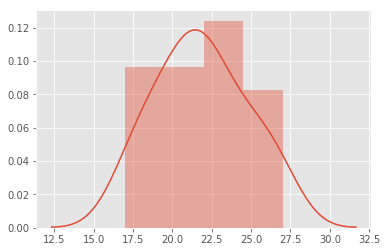

In [6]:
sns.distplot(data)

### 1.2 t值 p值

In [7]:
t,p_two_tail =stats.ttest_1samp(data,pop_mean)
p_one_tail = p_two_tail / 2
print('t值=',t,'\n双尾检验的p值=',p_two_tail, '\n左尾检验的p值=',p_one_tail) 

t值= -5.933279256297862 
双尾检验的p值= 2.1902343467816044e-06 
左尾检验的p值= 1.0951171733908022e-06


当然也可以自己根据公式写：  

 \begin{equation}
 t = \frac{\overline{x}-\mu_0}{s / \sqrt{n}}
 \end{equation} 


In [8]:
tt = (data_mean-pop_mean)/np.sqrt(data_std**2/float(n))
pval = stats.t.sf(np.abs(tt), n-1)*2 
print('t值=',tt,'\n双尾检验的p值=',pval, '\n左尾检验的p值=',pval /2 )

t值= -5.933279256297862 
双尾检验的p值= 2.1902343467816044e-06 
单尾检验的p值= 1.0951171733908022e-06


In [9]:
if t<0 and p_one_tail< alpha:     
    print('拒绝H0，统计显著，应该建议NBA跪族篮孩购买轮椅')
else: 
    print('不拒绝H0，统计不显著，不应该建议NBA跪族篮孩购买轮椅')

拒绝H0，统计显著，应该建议NBA跪族篮孩购买轮椅


### 1.3 置信区间
- 以一定的概率保证估计包含总体参数的一个值域
- 根据样本指标和抽样平均误差推断总体指标的可能范围
- 两部分（准确程度与可靠程度）
 - 可能范围
 - 总体指标落在这个可能范围内的概率

In [10]:
std_err = stats.sem(data)
#自由度
df = len(data) - 1
#置信水平
confidence = 1 - alpha

#置信区间confidence_interval
CI = stats.t.interval(confidence, df, loc = data_mean, scale = std_err)
CI

(20.732341100469924, 22.92283131332318)

更好的办法是**利用statsmodels模块中的DescrStatsW函数**

In [11]:
print("95%置信水平下，建议购买的年龄置信区间为[")
sms.DescrStatsW(data).tconfint_mean(alpha = alpha)

95%置信水平下，建议购买的年龄置信区间为[


(20.732341100469924, 22.92283131332318)

### 1.4 效应量  

效应量  

- 假设检验具有统计显著的结论时，进一步说明其是否效果显著。
- 即回答P值没有回答的问题：究竟统计量的差异程度有多大？
- 效应量太小，意味着处理即使达到了显著水平，也缺乏实用价值。  

**Cohen's d**  ([wiki](https://en.wikipedia.org/wiki/Effect_size#Cohen's_d))。  
- 表明两个平均数之间的标准差异  

 \begin{equation}   
 d = \frac{\overline x_1 - \overline x_2}{s}  
\end{equation}  

    s是Pooled SD [(pooled standard deviation)](https://en.wikipedia.org/wiki/Pooled_standard_deviation)
    - 小效应量：d = 0.20
    - 中效应量：d = 0.50
    - 大效应量：d = 0.80
 
本例的总体方差未知，欲估计效应量，则Pooled variance可用样本方差$S^2$代替。  


In [12]:
d = np.abs(data_mean - pop_mean)/data_std
print("效应量为{}, 大于0.8，因此是大效应量，与建议年龄25岁的差异程度较大。应趁早买。".format(d))

效应量为1.1017822979971184, 大于0.8，因此是大效应量，与建议年龄25岁的差异程度较大。


## 2. 男生的体重与标准体重的调查

背景：
- 生活水平提高了，人们越来越管不住自己的嘴。看着自己越来越膨胀的身体，大家都开始决定要减肥。有个很明显的现象就是，大多数女生都会公开地表示自己在减肥（在准备着），而男生一般不会这样。考察男生的体重是否明显地等于标准体重。



数据：  
- 在小卖部门口随机抽取28个年龄为23，身高为176cm的路人，称其重量。受访者为28名男性：
    - [63,63,63,63,63,63,63,63,63,64,64,64,65,74,58,60,61,61,62,62,62,68,84,73,63,80,100,62]  

- 年龄为23岁的男性标准体重为63kg

问题：  
- 根据以上数据，请问男生的体重是否明显地等于标准体重。

零假设与备择假设：  
- H0: 男生的体重不明显地等于标准体重：即均值$\mu \neq 63$  

- H1: 男生的体重明显地等于标准体重即均值$\mu = 63$  

检验类型：  

- 样本小于30。总体正态分布，已知总体均值=63，总体标准差未知。 应选择单样本t检验，备选假设的为双尾检验。  

显著性水平：0.05

###  2.1 样本,最大值,最小值,平均值,标准差

In [13]:
data = Series([63,63,63,63,63,63,63,63,63,64,64,64,65,74,58,60,61,61,62,62,62,68,84,73,63,80,100,62])
#data = Series([63,63,63,63,63,63,63,63,63,64,64,64,65,74,58,60,61,61,62,62,62,68,84,63,63,63,63,63])
n=28
pop_mean = 63 #总体均值
alpha = 0.05

data_min = data.min()
data_max = data.max()
data_mean = data.mean()
data_std = data.std()
print('样本最大值= {}'.format(data_max))
print('样本最小值= {}'.format(data_min))
print('样本平均值= {:.2f}'.format(data_mean))
print('样本标准差= {:f}'.format(data_std))

样本最大值= 100
样本最小值= 58
样本平均值= 66.21
样本标准差= 8.837450


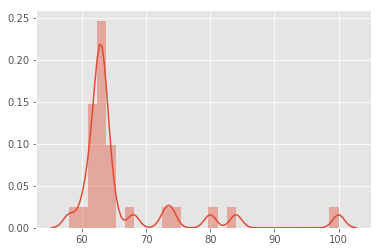

In [14]:
sns.distplot(data)

### 2.2 t值 p值

In [15]:
t,p_two_tail =stats.ttest_1samp(data,pop_mean)
print('t值=',t,'\n双尾检验的p值=',p_two_tail) 

t值= 1.9245823814527732 
双尾检验的p值= 0.06487927866701991


在相同显著性水平α的条件下，单尾临界值比双尾临界值更靠近MEAN。（α=0.05时单尾和双尾的临界值不同）
![替代文字](1.png)

In [16]:
if p_one_tail< alpha:     
    print('拒绝H0，统计显著,男生的体重明显地等于标准体重')
else: 
    print('接受H0，统计不显著，男生的体重不明显地等于标准体重')

拒绝H0，统计显著,男生的体重明显地等于标准体重


### 2.3 置信区间

In [17]:
print("95%置信水平下，男生平均体重置信区间为[")
sms.DescrStatsW(data).tconfint_mean(alpha = alpha)

95%置信水平下，男生平均体重置信区间为[


(62.78748020010467, 69.64109122846675)

### 2.4 效应量  


In [18]:
d = np.abs(data_mean - pop_mean)/data_std
print("效应量为{}, 小于0.8，因此不是大效应量，与标准体重的差异程度较小。".format(d))

效应量为0.3637118827843205, 小于0.8，因此不是大效应量，与标准体重的差异程度较小。


## 3. 二线城市硕士毕业生起薪调查 

背景：
- 很多人以为读了硕士工资就会比本科高，这在一线城市可能是成立的。那么在二线城市呢。

数据：  
- 随机抽取28个在某个二线城市的硕士毕业生，其起薪为:[4423, 4434, 4528, 4504, 4562, 4674, 4683, 4610, 4620, 4618, 4627, 4715, 4750, 4620, 4622, 4623, 4710, 4800, 4721, 4680, 5000, 4700, 4689, 4643, 4743, 4632, 4623, 4732] 

- 已知某二线城市本科生平均工资为4500

问题：  
- 根据以上数据，请问是否应该建议NBA跪族篮孩购买[♿️轮椅♿️](https://www.taobao.com/)。

零假设与备择假设：  
- H0: 二线城市硕士毕业生起薪不高于本科生：即均值$\mu<=4500$  

- H1: 二线城市硕士毕业生起薪高于本科生：即均值$\mu>4500$  

检验类型：  

- 样本小于30。总体正态分布，已知总体均值=4500，总体标准差未知。 应选择单样本t检验，备选假设的方向为“>”，因此为单尾（右侧）检验。  

显著性水平：0.05

###  3.1 样本,最大值,最小值,平均值,标准差

In [33]:
data = Series([4523, 4534, 4528, 4604, 4600, 4674, 4600, 4610, 4620, 4618, 4627, 4715, 4750, 4620, 4622, 4623, 
               4710, 4800, 4721, 4680, 5000, 4700, 4689, 4643, 4743, 4632, 4623, 4732])
n=28
pop_mean = 4500 #总体均值
alpha = 0.05

data_min = data.min()
data_max = data.max()
data_mean = data.mean()
data_std = data.std()
print('样本最大值= {}'.format(data_max))
print('样本最小值= {}'.format(data_min))
print('样本平均值= {:.2f}'.format(data_mean))
print('样本标准差= {:f}'.format(data_std))

样本最大值= 5000
样本最小值= 4523
样本平均值= 4662.18
样本标准差= 95.011911


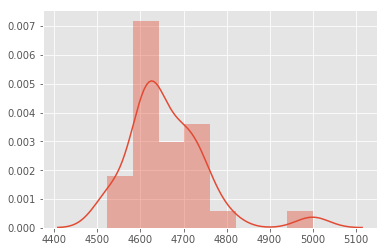

In [34]:
sns.distplot(data)

### 3.2 t值 p值

In [40]:
t,p_two_tail =stats.ttest_1samp(data,pop_mean)
p_one_tail = p_two_tail / 2
print('t值=',t,'\n双尾检验的p值=',p_two_tail, '\n右尾检验的p值=',p_one_tail) 

t值= 9.032218457058805 
双尾检验的p值= 1.2028848362266923e-09 
右尾检验的p值= 6.014424181133462e-10


In [41]:
if p_one_tail< alpha:     
    print('拒绝H0，统计显著，二线城市硕士毕业生起薪高于本科生')
else: 
    print('不拒绝H0，统计不显著，二线城市硕士毕业生起薪不高于本科生')

拒绝H0，统计显著，二线城市硕士毕业生起薪高于本科生


### 3.3 置信区间

In [38]:
print("95%置信水平下，二线城市硕士毕业生起薪置信区间为")
sms.DescrStatsW(data).tconfint_mean(alpha = alpha)

95%置信水平下，二线城市硕士毕业生起薪置信区间为[


(4625.336798440202, 4699.020344416941)

### 3.4 效应量  
  


In [42]:
d = np.abs(data_mean - pop_mean)/data_std
print("效应量为{}, 大于0.8，因此是大效应量，与本科生薪资的差异程度较大。".format(d))

效应量为1.7069288446132234, 大于0.8，因此是大效应量，与本科生薪资的差异程度较大。
